# Прогноз продаж компьютерных игр компании "Стримчик" на 2017 год

Цель проекта: выявить факторы, которые влияют на успешность игры, чтобы использовать эту информацию для построения рекламной кампании на 2017 год.

Для определения этих факторов будут выполены следующие шаги:

- обработка пропусков и дубликатов
- расчет суммарных продаж по всем регионам для каждой игры
- определение количества игр, выпускаемых в разные годы
- определение среднего срока, за который появлется и исчаезает платформа
- определение актуального период
- определение тендеций продаж на платформах в течение актуального периода
- определение влияния рейтингов критиков и пользовательских рейтингов на продажи внутри платформ
- определение самых прибыльных жанров
- определение топ-5 самых популярных платформ, жанров и рейтинга ESRB для пользователей из разных регионов
- проверка гипотез о равенстве средних пользовательских рейтингов платформ Xbox One и PC и о равенстве средних пользовательских рейтингов жанров Action и Sports

Описание используемых столбцов:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB 



## Общая информация по данным

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from pylab import rcParams

In [2]:
data = pd.read_csv('C:\\Users\\User\\Downloads\\Yandex_projects\\games.csv') # чтение файла
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info() # общая информация по датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe() # статистическая информация по датафрейму

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
for column in data.columns: # для каждого столбца
    print(f'Число пропущенных значений в столбце {column}:', data[column].isna().sum()) # почитать сумму пропущенных значений
    print(f'Процент пропущенных значений в столбце {column}:', (data[column].isna().sum()/len(data)).round(2)) # посчитать процент пропущенных значений
    print()

Число пропущенных значений в столбце Name: 2
Процент пропущенных значений в столбце Name: 0.0

Число пропущенных значений в столбце Platform: 0
Процент пропущенных значений в столбце Platform: 0.0

Число пропущенных значений в столбце Year_of_Release: 269
Процент пропущенных значений в столбце Year_of_Release: 0.02

Число пропущенных значений в столбце Genre: 2
Процент пропущенных значений в столбце Genre: 0.0

Число пропущенных значений в столбце NA_sales: 0
Процент пропущенных значений в столбце NA_sales: 0.0

Число пропущенных значений в столбце EU_sales: 0
Процент пропущенных значений в столбце EU_sales: 0.0

Число пропущенных значений в столбце JP_sales: 0
Процент пропущенных значений в столбце JP_sales: 0.0

Число пропущенных значений в столбце Other_sales: 0
Процент пропущенных значений в столбце Other_sales: 0.0

Число пропущенных значений в столбце Critic_Score: 8578
Процент пропущенных значений в столбце Critic_Score: 0.51

Число пропущенных значений в столбце User_Score: 670

In [6]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [8]:
data['Name'] = data['Name'].str.lower() # приведение названий игр к нижнему регистру
data.duplicated().sum() # количество дубликатов

0

In [9]:
for column in data: # для каждого столбца в датафрейме
    print('Количество уникальных значений в столбце ' + column + ': ' + str(len(data[column].unique()))) # распечатать название колонки и количество уникальных значений в нем
    print()
    print(data[column].unique()) # вывести уникальные значения каждого столбца
    print()

Количество уникальных значений в столбце Name: 11560

['wii sports' 'super mario bros.' 'mario kart wii' ...
 'woody woodpecker in crazy castle 5' 'lma manager 2007'
 'haitaka no psychedelica']

Количество уникальных значений в столбце Platform: 31

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Количество уникальных значений в столбце Year_of_Release: 38

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

Количество уникальных значений в столбце Genre: 13

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

Количество уникальных значений в столбце NA_sales: 402

[4.136e+01 2.908e+01 1.5

**Вывод**

Необходимо привести все названия колонок в таблице к нижнему регистру.

В таблице нет явных дубликатов.

В таблице имеются пропущенные значения в столбцах 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_score' и 'Rating'. Пропущенные значения в 'Name', 'Year_of_Release' и 'Genre' будут удалены, так как значения этих столбцов принципиально важны для анализа, но заменить их чем-либо не представляется возможным. Также пропуски в этих столбцах составляют малую часть от всех строк датафрейма (около 0.02% от всей информации в датафрейме), поэтому их удаление не должно сильно исказить данные.   В 'Critic_score' и 'User_score' пропущенные значения могут быть из-за того, что для игр без оценок могла не набрать достаточное количество отзывов, чтобы определить рейтинг. Пропуски в этих колонках будут заменены отрицательным маркером, так как оценка не может быть равна отрицательному числу, а следовательно такие значения при необходимости можно легко выделить. В столбце 'Rating' рейтинги имеют строковый тип данных, поэтому будет использован маркер 'unknown'.

В столбцах 'Year_of_Release', 'Critic_Score' и 'User_Score' необходимо преобразовать тип данных. В 'Year_of_Release' и 'Critic_Score' тип данных будет изменен с float на int, для более точного хранения информации. В 'User_Score' тип данных будет изменен с object на float для того, чтобы со значениями столбца можно было произвести расчеты. В столбце 'User_Score' присутствует значение 'tbd'. Эта аббревиатура означет 'to be defined'/'to de determined', поэтому значение можно также заменить отрицательным маркером по той же причине.


|Столбец | Замена типа данных | Пропуски | Подозрительные значения   |
|------------|:----------------:|:------------:|-------------:|
|Name |  нет       | удалить     |    нет      |
|Platform    | нет        |  нет    |   нет      |
| Year_of_Release    |  float на int       | удалить     |  нет    |
| Genre    |  нет       | удалить     |     нет    |
| NA_sales   |  нет       | нет     |   нет    |
| EU_sales    | нет        | нет     |  нет       |
| JP_sales    | нет        | нет     |   нет      |
| Other_sales    | нет        | нет     |   нет       |
| Critic_score    | нет        | заменить на отрицательный маркер     |     нет       |
| User_score    |  object на float       | заменить на отрицательный маркер     |  'tbd' заменить на отрицательный маркер |
| Rating    |  нет       | заменить на маркер 'unknown'   |   нет        |

## Подготовка данных

### Замена названий столбцов

In [10]:
data.columns = data.columns.str.lower() # приведение названий столбцов к нижнему регистру
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод**

Название столбцов были пререведены в нижний регистр для того, чтобы столбцы имели общепринятный формат, а также, чтобы к ним в последствии было удобнее обращаться

### Обработка пропусков

In [11]:
# удаление пропусков в 'name', 'year_of_release' и 'genre'
data = data.dropna(subset = ['name', 'year_of_release', 'genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [12]:
data['critic_score'] = data['critic_score'].fillna(value=-1) # замена пропущенных значений в столбцу 'critic_score' на отрицательный маркер
data['critic_score'].isna().sum() # проверка замены

0

In [13]:
data['user_score'] = data['user_score'].fillna(value=-1) # замена пропущенных значений в столбцу 'user_score' на отрицательный маркер
data['user_score'].isna().sum() # проверка замены пропущенных значений

0

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1 # также в столбце 'user_score' будут заменены на отрицательный маркер
data['user_score'].unique() # проверка замены 'tbd'

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [15]:
data['rating'] = data['rating'].fillna(value='unknown') # замена пропущенных значений в столбцу 'rating' на отрицательный маркер
data['rating'].isna().sum() # проверка замены

0

**Вывод**

Строки с пропущенными значениями в столбцах 'name', 'year_of_release' и 'genre' были удалены, так как значения в этих столбцах важны для дальнейшего анализа, но пропуски восстановить не представляется возможным. 

Пропуски в столбцах 'critic_score', 'user_score' и 'rating', скорее всего, означают, что у игр не набралось достаточно количество оценок, чтобы выставить рейтинг. Строки с пропущенными значениями в столбцах 'critic_score' и 'user_score' были заменены отрицательними маркерами, так как оценки ниже нуля быть не могут, поэтому заполненные таким образом значения будет легко найти при необходимости. В столбце 'user_score' есть два вида пропушенных значений: NaN и 'tbd' ('to be determined'). Обе категории пропущенны значенитй были заменены отрицательным маркером. В столбце 'rating' пропуски были заменены значением 'unknown'.

### Изменение типов данных

In [16]:
data['year_of_release'] = data['year_of_release'].astype(int) #изменение типа данных столбца 'year_of_release' с float на int

In [17]:
data['user_score'] = data['user_score'].astype(float) # изменение типа данных столбца 'user_score' с object на float
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


**Вывод**

В столбце 'user_score' тип данных был заменен с float на int для повышениях точности хранения данных. В столбце 'user_score' тип данных был изменен с object на float, чтобы со значениями этого столбца было удобнее производить расчеты.

### Добавление столбца с информацией по сумме продаж по регионам

In [18]:
def sum_sales(row):
    """Функция возращает сумму продаж игр по всем регионам"""
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']

data['sum_sales'] = data.apply(sum_sales, axis=1) # создание столбца с суммой продаж по играм
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown,30.26
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown,28.31


**Вывод**

В таблицу был добавлен столбец с суммой продаж по каждой игре. Этот столбец необходим для анализа продаж в зависимости от различных факторов, таких как платформа, жанр, регион.

## Исследовательский анализ данных

### Количество игр, выпущенных в разные годы

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


Text(0, 0.5, 'Количество игр, млн')

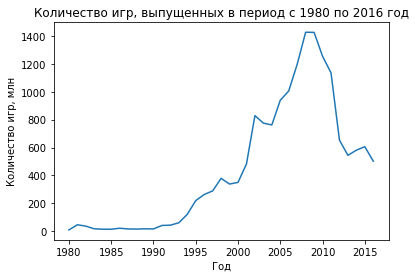

In [19]:
games_released_each_year = data.groupby('year_of_release')['name'].count() # группировка датафрейма по году выпуска игр и подсчет
# количества выпущенных игр в каждом году
print(games_released_each_year)
games_released_each_year.plot()
plt.title('Количество игр, выпущенных в период с 1980 по 2016 год')
plt.xlabel('Год') # подпись оси х
plt.ylabel('Количество игр, млн') # подпись оси у


**Вывод**

С 1980 до 1994 года количество выпускаемы игр было довольно невелико. В этот период игровая индустрия проходила через кризис, поэтому количество выпускаемых игр было невелико. С середины 90-ых индустрия начала восстанавливается (на графике виден заметный рост начиная с 1994 года), особенно с появлением трехмерной полигональной графики, появления новых жанров и продуманных сюжетных линий у игр. Количество компьютерных игр, выпущенных за год, достигло своего пика в 2010 году. Начиная с 2010 года, количество выпускаемых в год видеоигр начало резко снижаться, и на 2016 год составляло половину от пиковых значений. Вероятно, количество игр, выпущенных для игровых платформ, уменьшилось из-за того, что пользователи начали играть на мобильных телефонах.


### Продажи по платформам и определение границ актуального периода

In [20]:
data_sales_grouped = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False) # суммарные продажи для каждой игры по всем регионам,
# отсортированные по убыванию
data_sales_grouped

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

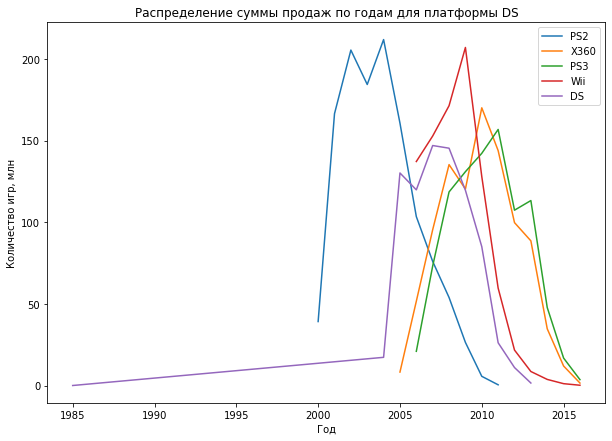

In [21]:
plt.figure(figsize=(10,7)) # размер графика
for i in data_sales_grouped.head().index: # для каждой платформы из пяти платформ с максимальными продажами
    data_i = data.query(f'platform == "{i}"').pivot_table(index='year_of_release',values='sum_sales', aggfunc='sum') # сформировать сводную таблицу с суммой продаж за год
    plt.plot(data_i.index, data_i['sum_sales']) # построить столбчатую диаграмму
plt.title(f'Распределение суммы продаж по годам для платформы {i}') # название таблицы
plt.xlabel('Год') # подпись оси х
plt.ylabel('Количество игр, млн') # подпись оси у
plt.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS']) # легенда графика

In [22]:
data_platform = data[['platform', 'year_of_release']] # таблица с годами выпуска каждой игры на каждой платформе
data_platform_pivot = data_platform.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']) # сводная таблица, где для каждой платформы определены первый и последний год выпуска
data_platform_pivot.columns = ['min_year_of_release', 'max_year_of_release'] # переименование столбцов
data_platform_pivot['platform_duration'] = data_platform_pivot['max_year_of_release']  - data_platform_pivot['min_year_of_release'] + 1 # расчет количества лет, в теченение которых выпускалась платформа с учетом года, в который она прекратила выпускаться
print('Средний срок жизни платформы:', data_platform_pivot['platform_duration'].mean()) # средний срок жизни платформы

Средний срок жизни платформы: 8.612903225806452


**Вывод**

Судя по данным, полученным по 5 платформам с максимумальной суммой продаж, на возникновение и исчезновение новой платформы уходит примерно 8.6 лет, но платформы обычно очень быстро набирают популярность, а потом постепенно ее теряют. Также менее популярные платформы, вероятно, будут иметь меньший срок "жизни".

Для того чтобы проанализировать, какие платформы сейчас набирают популярность или ее теряют, при условии общего спада в сфере игр на платформах, и при этом не захватить большое количество платформ, которые уже перестали выпускаться, актуальным будет считаться период с 2012 по 2016 год. 


### Составление таблицы с информацией за актуальный период

In [23]:
data_actual = data.query('year_of_release > 2011') # таблица, в которой находятся данные за 2006 год и позже
data_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
34,call of duty: black ops ii,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,call of duty: black ops ii,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
60,call of duty: ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,new super mario bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


**Вывод**

Был составлен датафрейм data_actual за актуальный период, содержащий информацию на выпущенным играм с 2012 по 2016 год.

### Выбор потенциально прибыльных платформ

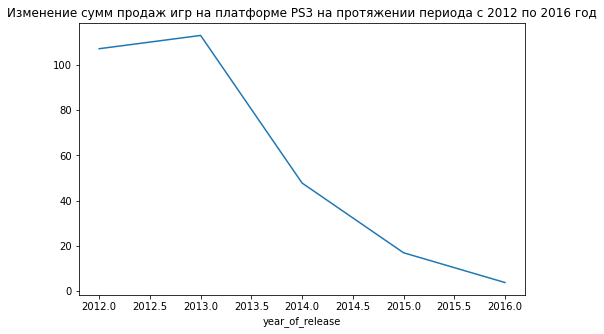

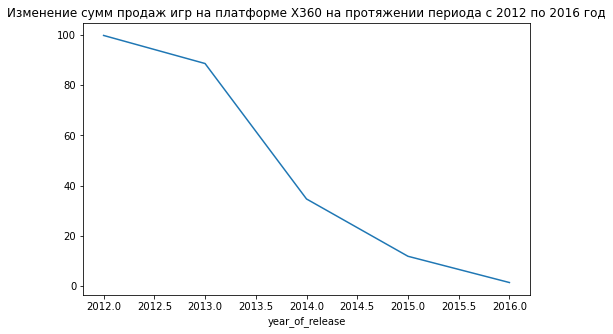

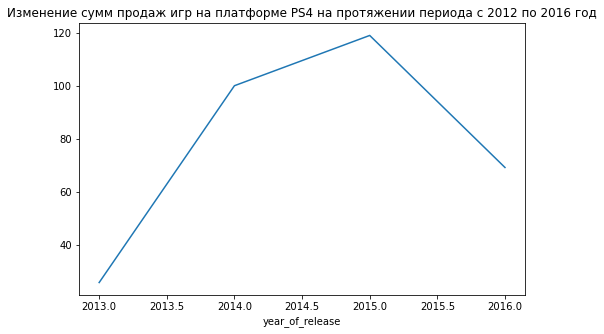

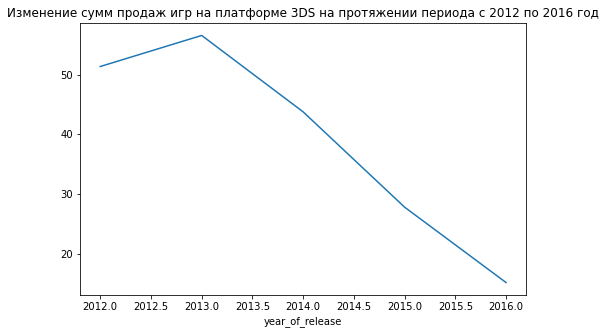

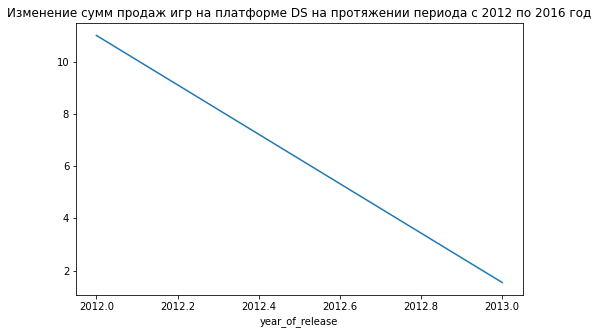

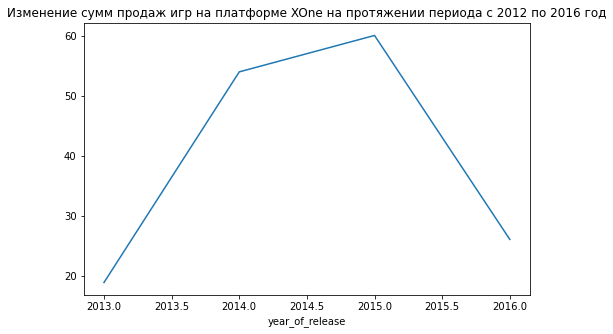

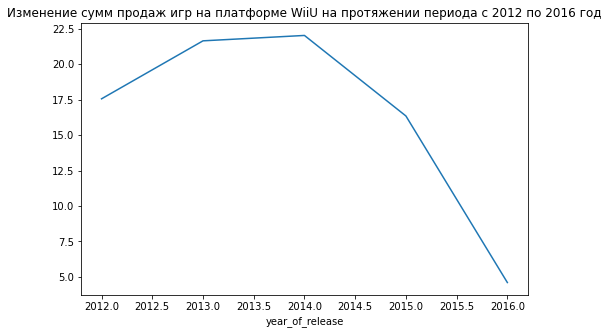

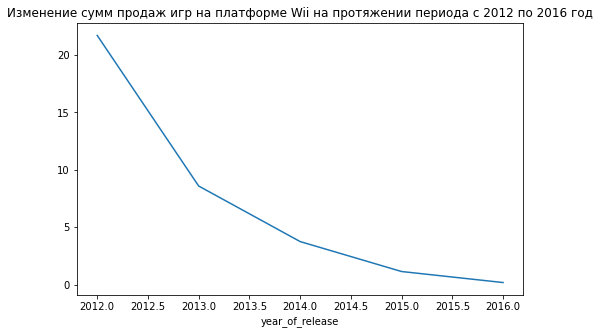

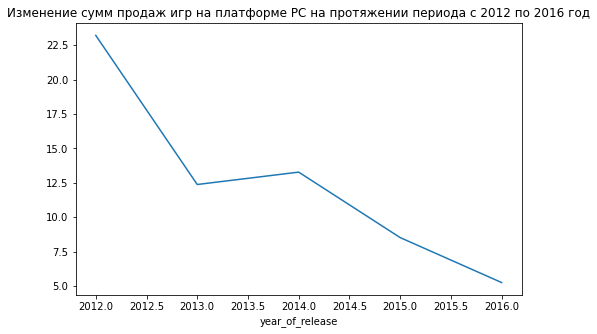

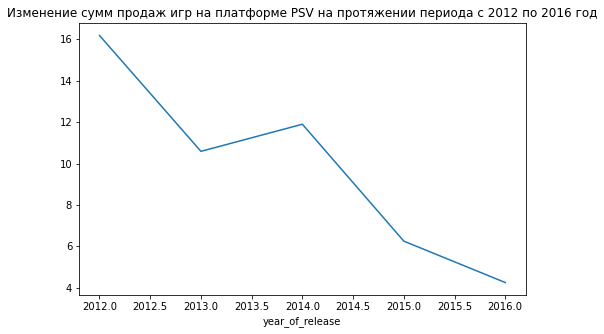

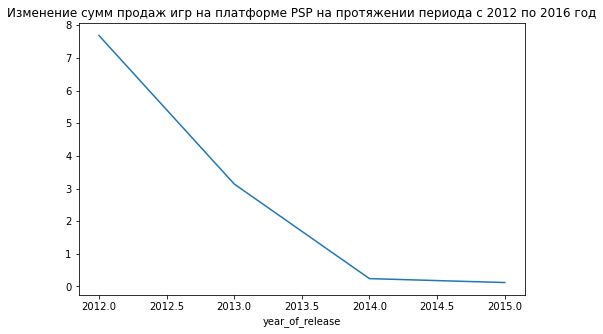

In [24]:
platforms = data_actual['platform'].unique() # уникальные платформы в таблице с информацией по актуальному периоду
for i in platforms: # для каждой платформы в списке platforms
    data_actual.query(f'platform == "{i}"').pivot_table(index='year_of_release', values='sum_sales', aggfunc='sum').plot(legend = False, figsize=(8,5)) # построить график для игр на этой платформе на основе сводной таблицы по суммам продаж за каждый год
    plt.title(f'Изменение сумм продаж игр на платформе {i} на протяжении периода с 2012 по 2016 год')

**Вывод**

К 2016 годы платформы DS, Wii, X360 и PSP перестали поддерживаться (продажи упали до 0 или нет никакой информации после определенного года). Среди оставшихся платформ (PS3, PS4, 3DS, PC, XOne, WiiU, PSV) на конец 2016 года на всех платформах виден спад продаж. Самое высокое количество продаж на конец 2016 года у платформы PS4 (около 70 млн проданных копий), однако количество продажи, начиня с 2015 года, идут на спад. Второе место по количетсву продаж занимает XOne (примерно 27 миллионов проданных копий). На платформах 3DS, PC, WiiU и PSV количество проданных копий находится в районе 5 миллионов.

Так как PS4 и XOne имеют довольно большое количество проданных копий, то скорее всего в 2017 эти платформы еще будут поддерживаться. 3DS, PC, WiiU и PSV имеют очень низкие продажи, поэтому они возможно перестанут поддерживаться в 2017 году.

### Диаграммы размаха по глобальным продажам игр в разбивке по платформам

Text(0, 0.5, 'Количество проданных копий, млн')

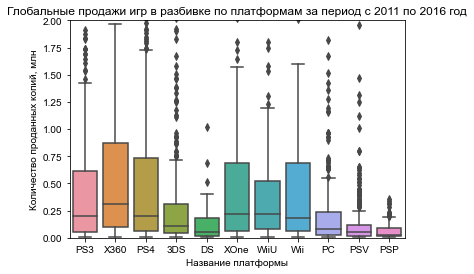

In [25]:
box = sns.boxplot(x=data_actual['platform'], y=data_actual['sum_sales'])
sns.set(rc={'figure.figsize':(10, 8)})
box.set(ylim=(0, 2)) # увеличение области, содержащей медианные и нормальные значения
box.axes.set_title('Глобальные продажи игр в разбивке по платформам за период с 2011 по 2016 год') # название диаграммы
box.set_xlabel('Название платформы') # подпись оси х
box.set_ylabel('Количество проданных копий, млн') # подпись оси у

**Вывод**

У всех платформ кроме X360 и PS3 медианна продаж ниже 250 тысяч копий. X360, PS3 и PS4 имеют самые большие границы нормальных значений продаж (от 0 до 1.75 млн копий). Самый узкий диапазон нормальных значений продаж имеет платформа DC (от 0 до менее чем 0.05 млн копий). У платформы Wii обнаружено рекордное количество проданных копий - более 80 млн, при том, что медианна и интервал нормальных значений для этой платформы не слишком большие.

### Влияние отзывов пользователей и критиков на продажи внутри платформы Wii

Для нахождения зависимости между продажами внутри платформы и оценками критиков и пользователей на примере одной платформы, была взята платформа WiiU.

In [26]:
data_wiiu = data_actual.query('platform == "WiiU"') # таблица, создержащая информацию только по платформе Wii
data_wiiu.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
110,mario kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
185,new super mario bros. u,WiiU,2012,Platform,2.30,1.34,1.27,0.32,84.0,8.1,E,5.23
216,super smash bros. for wii u and 3ds,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,-1.0,-1.0,unknown,4.87
247,splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
248,nintendo land,WiiU,2012,Misc,2.52,1.11,0.46,0.33,77.0,7.9,E10+,4.42


Коэффициент корреляции между суммой продаж игр внутри платформы Wii и оценками критикой: 0.3


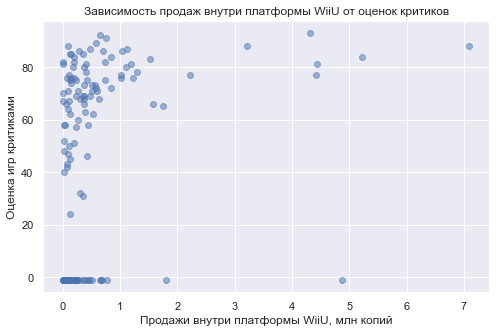

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x = data_wiiu['sum_sales'], y = data_wiiu['critic_score'], alpha = 0.5)
# диаграмма рассеяния для платформы WiiU для заисимости продаж игр внутри платформы и оценки критиков
plt.xlabel('Продажи внутри платформы WiiU, млн копий')
plt.ylabel('Оценка игр критиками')
plt.title('Зависимость продаж внутри платформы WiiU от оценок критиков')
print('Коэффициент корреляции между суммой продаж игр внутри платформы Wii и оценками критикой:', data_wiiu['sum_sales'].corr(data_wiiu['critic_score']).round(2))

Коэффициент корреляции между суммой продаж игр внутри платформы Wii и оценками пользователей: 0.26


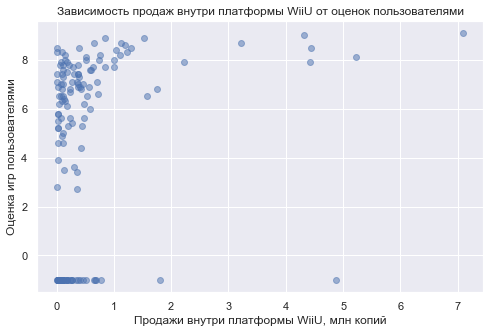

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(x = data_wiiu['sum_sales'], y = data_wiiu['user_score'], alpha = 0.5)
plt.xlabel('Продажи внутри платформы WiiU, млн копий')
plt.ylabel('Оценка игр пользователями')
plt.title('Зависимость продаж внутри платформы WiiU от оценок пользователями')
print('Коэффициент корреляции между суммой продаж игр внутри платформы Wii и оценками пользователей:', data_wiiu['sum_sales'].corr(data_wiiu['user_score']).round(2))

**Вывод**

Внутри платформы WiiU присутствует слабая положительная взаимосвязь между продажами игр внутри платформы и оценкой критиков (коэффициент корреляции 0.3 ), также слабая положительная взаимрсвязь присуствует между продажам игр внутри платформы и оценкой пользователей (коэффициент корреляции 0.26). Это означает, что внутри платформы WiiU присутствуют дополнительные факторы, которые влияют на продажи игр помимо оценок критиков и пользователей.

### Коэффициенты корреляции между суммой продаж и оеценкми критиков и пользователей для других платформ

In [29]:
platforms = data_actual['platform'].unique() # список актуальных платформ за уникальный период
for i in platforms: # для каждой уникальной платформы
    print("Коэффициент корреляции между суммой продаж и оценкой критиков на платформе " + i + ": " + str(data_actual.query(f'platform == "{i}"')['sum_sales'].corr(data_actual.query(f'platform == "{i}"')['critic_score']).round(2))) # вывести коэффицинет коррекляции между суммой продаж и оценкой критиков
    print("Коэффициент корреляции между суммой продаж и оценкой пользователей на платформе " + i + ": " + str(data_actual.query(f'platform == "{i}"')['sum_sales'].corr(data_actual.query(f'platform == "{i}"')['user_score']).round(2))) # вывести коэффицинет коррекляции между суммой продаж и оценкой пользователей
    print()

Коэффициент корреляции между суммой продаж и оценкой критиков на платформе PS3: 0.3
Коэффициент корреляции между суммой продаж и оценкой пользователей на платформе PS3: 0.22

Коэффициент корреляции между суммой продаж и оценкой критиков на платформе X360: 0.26
Коэффициент корреляции между суммой продаж и оценкой пользователей на платформе X360: 0.1

Коэффициент корреляции между суммой продаж и оценкой критиков на платформе PS4: 0.23
Коэффициент корреляции между суммой продаж и оценкой пользователей на платформе PS4: 0.12

Коэффициент корреляции между суммой продаж и оценкой критиков на платформе 3DS: 0.15
Коэффициент корреляции между суммой продаж и оценкой пользователей на платформе 3DS: 0.13

Коэффициент корреляции между суммой продаж и оценкой критиков на платформе DS: 0.08
Коэффициент корреляции между суммой продаж и оценкой пользователей на платформе DS: 0.08

Коэффициент корреляции между суммой продаж и оценкой критиков на платформе XOne: 0.27
Коэффициент корреляции между суммой 

In [30]:
# матрица корреляции
platform_score = data_actual[['platform','sum_sales', 'critic_score', 'user_score']]
print(platform_score.corr())

              sum_sales  critic_score  user_score
sum_sales      1.000000      0.248010    0.182361
critic_score   0.248010      1.000000    0.840881
user_score     0.182361      0.840881    1.000000


**Вывод**

Почти на всех платформах наблюдается слабая положительная взаимосвязь между суммой продаж внутри платформы и оценками пользователей и критиков. Самая сильная положительная корреляция между оценками и продажами у платформы Wii, однако к концу 2016 года эта платформа уже перестала поддреживаться. Вероятно, присутствуют другие факторы, которые влияют на суммы продаж помимо оценок (например, продажи существенно повышает правильно спланированная рекламная компания, которая увеличивает интерес пользователей к игре до ее выпуска) или же связь между суммой продаж и оценками нелинейная. 

In [35]:
rcParams['figure.figsize'] = 12, 12

<AxesSubplot:>

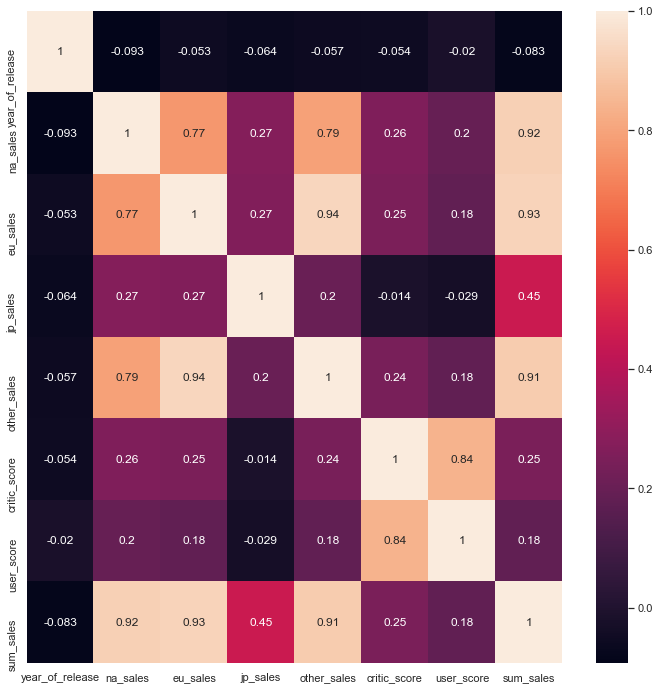

In [36]:
sns.heatmap(data_actual.corr(), annot=True)

In [37]:
data_actual.corr()[['user_score']]

,user_score
year_of_release,-0.020009
na_sales,0.197315
eu_sales,0.184224
jp_sales,-0.029270
other_sales,0.181937
critic_score,0.840881
user_score,1.000000
sum_sales,0.182361


### Определение прибыльности жанров

In [38]:
top_genres_sum = data_actual.groupby('genre')['sum_sales'].sum().sort_values(ascending=False) # суммы продаж игр в зависимости от жанра
top_genres_sum

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: sum_sales, dtype: float64

([<matplotlib.patches.Wedge at 0x1ec9ded4190>,
 [Text(0.6326458750291509, 0.899866210504984, 'Action'),
  Text(-0.9298029801081938, 0.5877639136438386, 'Shooter'),
  Text(-0.9563309561233106, -0.5435357415665272, 'Role-Playing'),
  Text(-0.26360328911194947, -1.067948175694571, 'Sports'),
  Text(0.3626294863995826, -1.0385084764187411, 'Misc'),
  Text(0.6684325085210389, -0.8736120314832388, 'Platform'),
  Text(0.8628827904627661, -0.6822267144602228, 'Racing'),
  Text(0.9875114327276391, -0.4845835018159469, 'Fighting'),
  Text(1.0561546883601118, -0.307469143581848, 'Simulation'),
  Text(1.0887563764262855, -0.15687432164348875, 'Adventure'),
  Text(1.0986135799195862, -0.05521052450639659, 'Strategy'),
  Text(1.0999379652533312, -0.011682148533633542, 'Puzzle')],
 [Text(0.3450795681977186, 0.4908361148209003, '30.5%'),
  Text(-0.5071652618771966, 0.3205984983511847, '21.1%'),
  Text(-0.5216350669763512, -0.2964740408544693, '13.3%'),
  Text(-0.14378361224288153, -0.5825171867424932,

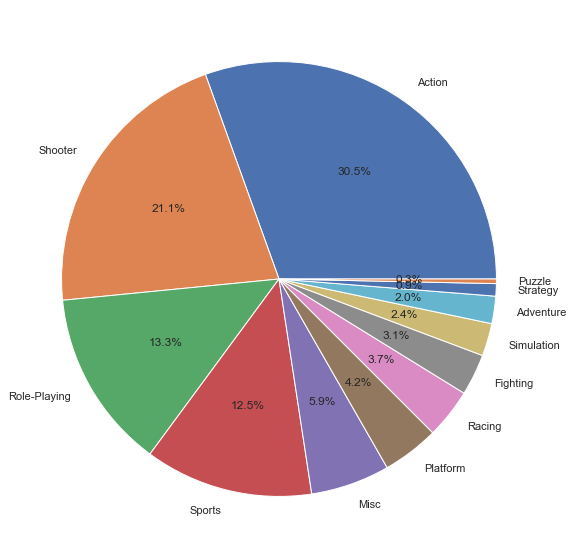

In [39]:
# круговая диаграмма общей суммы продаж в зависимости от жанра
fig, axes = plt.subplots(figsize=(12, 10))
axes.pie(top_genres_sum.values, labels=top_genres_sum.index, autopct = '%1.1f%%')

In [40]:
top_genres_mean = data_actual.groupby('genre')['sum_sales'].mean().sort_values(ascending=False) # средние суммы продаж игр в зависимости от жанра
top_genres_mean

genre
Shooter         1.296723
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Racing          0.465217
Misc            0.442917
Simulation      0.439000
Action          0.427856
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
Name: sum_sales, dtype: float64

([<matplotlib.patches.Wedge at 0x1ec9df58190>,
 [Text(0.8442459945512601, 0.7051586351198954, 'Shooter'),
  Text(-0.22506474794760437, 1.0767292413746743, 'Platform'),
  Text(-0.8971476259987975, 0.6364951980688637, 'Sports'),
  Text(-1.0996520883354721, -0.027663778112092273, 'Role-Playing'),
  Text(-0.935217302998817, -0.5791101761941496, 'Racing'),
  Text(-0.5551581833227672, -0.9496311870877898, 'Misc'),
  Text(-0.06129627765999828, -1.098290838687562, 'Simulation'),
  Text(0.43789975648177076, -1.0090806723316061, 'Action'),
  Text(0.8322435520122735, -0.7192848324092441, 'Fighting'),
  Text(1.016200688746518, -0.42111300168850474, 'Strategy'),
  Text(1.0784408959497949, -0.21671463712219302, 'Puzzle'),
  Text(1.0984962049155542, -0.057498589427260924, 'Adventure')],
 [Text(0.4604978152097782, 0.3846319827926702, '22.2%'),
  Text(-0.12276258978960236, 0.5873068589316405, '12.3%'),
  Text(-0.48935325054479856, 0.3471791989466529, '11.5%'),
  Text(-0.5998102300011666, -0.01508933351

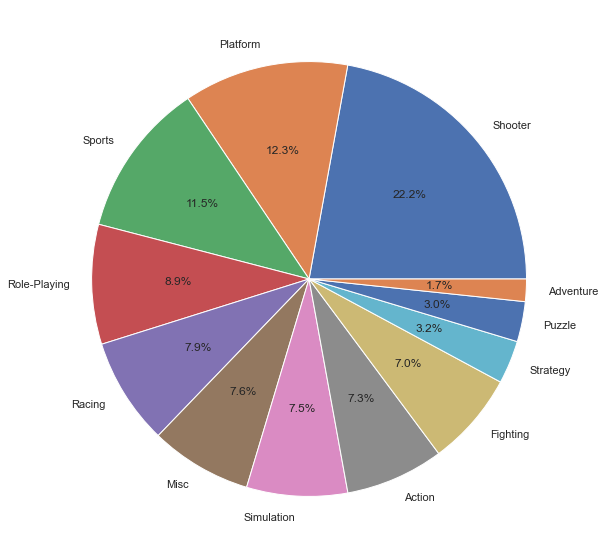

In [41]:
# круговая диаграмма средней суммы продаж в зависимости от жанра
fig, axes = plt.subplots(figsize=(12, 10))
axes.pie(top_genres_mean.values, labels=top_genres_mean.index, autopct = '%1.1f%%')

**Вывод**

Самыми прибыльными жанрами игр являются жанры action, sports и shooter, в то время как меньше всего прибыли приносят жанры adventure, puzzle и strategy. Популярность жанров action, sports и shooter может быть обусловлена тем, что эти жанры вызывают яркие эмоции у пользователей.

## Портрет пользователя каждого региона

In [42]:
other_sales = data_actual['other_sales'].sum()/(data_actual['na_sales'].sum() + data_actual['eu_sales'].sum() + data_actual['jp_sales'].sum()) # доля продаж, приходящиеся на регионы из категории "Другие"
print('Процент продаж, приходящиеся на регионы из категории "Другие": {:.1%}'.format(other_sales))

Процент продаж, приходящиеся на регионы из категории "Другие": 12.1%


На страные, входящие в категорию "Другие", приходится довольно малый процент продаж, поэтому рынок будет проанализирован только по Северной Америке, Европе и Японии.

### Определение самых популярных платформ для пользователей каждого региона

#### Топ-5 самых популярных плафторм в Северной Америке

In [43]:
data_na = data_actual[['platform', 'na_sales']].groupby('platform').agg('sum').sort_values(by = 'na_sales', ascending=False) # таблица с названиями платформ и суммарными продажами по каждой платформе в Северной Америке, отсортированная по убыванию
data_na

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
WiiU,38.10
PC,19.12
Wii,17.45
PSV,10.98


In [44]:
start_row = 5 # ряд, начиная с которого платформы объединятся в одну группу, в которой будет содержаться сумма продаж по платформ, не входящим в топ-5
data_na.iloc[start_row] = data_na.iloc[start_row:].sum() # начать суммировать строки, начиная с шестой
data_na = data_na.iloc[:start_row+1] # добавить cумму в последнюю строку
data_na.index = ['X360', 'PS4', 'PS3', 'XOne', '3DS', 'Other'] # переименование индексов, строки с шестой до последней включены в группу - 'Other'
data_na

,na_sales
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
Other,90.37


#### Топ-5 самых популярных плафторм в Европе

In [45]:
data_eu = data_actual[['platform', 'eu_sales']].groupby('platform').agg('sum').sort_values(by = 'eu_sales', ascending=False) # таблица с названиями платформ и суммарными продажами по каждой платформе в Европе, отсортированная по убыванию
data_eu

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64
PC,37.76
WiiU,25.13
Wii,11.92
PSV,11.36


In [46]:
start_row = 5 # ряд, начиная с которого платформы объединятся в одну группу, в которой будет содержаться сумма продаж по платформ, не входящим в топ-5
data_eu.iloc[start_row] = data_eu.iloc[start_row:].sum() # начать суммировать строки, начиная с шестой
data_eu = data_eu.iloc[:start_row+1] # добавить cумму в последнюю строку
data_eu.index = ['PS4', 'PS3', 'X360', 'XOne', '3DS', 'Other'] # переименование индексов, строки с шестой до последней включены в группу - 'Other'
data_eu

,eu_sales
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64
Other,90.12


#### Топ-5 самых популярных плафторм в Японии

In [47]:
data_jp = data_actual[['platform', 'jp_sales']].groupby('platform').agg('sum').sort_values(by = 'jp_sales', ascending=False) # таблица с названиями платформ и суммарными продажами по каждой платформе в Японии, отсортированная по убыванию
data_jp

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
PSP,10.47
DS,3.72
Wii,3.39
X360,1.57


In [48]:
start_row = 5 # ряд, начиная с которого платформы объединятся в одну группу, в которой будет содержаться сумма продаж по платформ, не входящим в топ-5
data_jp.iloc[start_row] = data_jp.iloc[start_row:].sum() # начать суммировать строки, начиная с шестой
data_jp = data_jp.iloc[:start_row+1] # добавить cумму в последнюю строку
data_jp.index = ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU', 'Other'] # переименование индексов, строки с шестой до последней включены в группу - 'Other'
data_jp

,jp_sales
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01
Other,19.49


#### Диаграммы процентного распределения продаж для самых популярных платформ в каждом регионе

Text(0.5, 1.0, 'Самые популярные платформы в Японии')

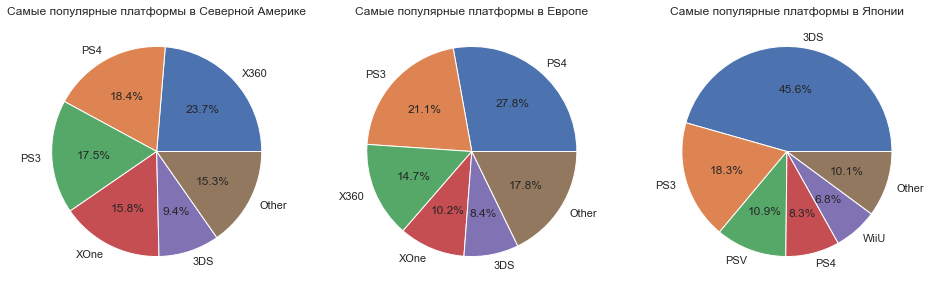

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5)) # создания ряда из трех диаграмм
axes[0].pie(data_na['na_sales'], labels=data_na.index, autopct = '%1.1f%%') # круговая диаграмма, показывающая доли продаж на топ-5 платформах в Северной Америке в процентах
axes[0].set_title('Самые популярные платформы в Северной Америке') # название диаграммы
axes[1].pie(data_eu['eu_sales'], labels=data_eu.index, autopct = '%1.1f%%') # круговая диаграмма, показывающая доли продаж на топ-5 платформах в Европе в процентах
axes[1].set_title('Самые популярные платформы в Европе') # название диаграммы
axes[2].pie(data_jp['jp_sales'], labels=data_jp.index, autopct = '%1.1f%%') # круговая диаграмма, показывающая доли продаж на топ-5 платформах в Европе в процентах
axes[2].set_title('Самые популярные платформы в Японии') # название диаграммы

**Вывод**

В топ-5 самых распространенных платформ в Северной Америке входят X360, PS4, PS3, XOne и 3DS; в Европе - PS4, PS3, X360, XOne и 3DS; в Японии - 3DS, PS3, PSV, PS4 и WiiU. Во всех регионах в топ-5 входят платформы 3DS, Ps3 и PS4.

Несмотря на то, что в Северной Америке и в Европе в топ-5 самых популярных платформ входят одинаковые названия, но процент продаж распределяется по-разному. В Северной Америке лидирует Х360, а уже потом идут PS4 и PS3, в то время как в Европе - PS4 и PS3 стоят на первом и втором месте соответственно, а Х360 стоит на третьем месте. XOne и 3DS в обоих регионах стоят на четвертой и пятом месте соответственно.

Процент продаж игр в зависимости от платформы кардинально отличается в Японии. В Японии практически половину рынка занимает платформа 3DS. В Японии также популярны платформы PSV и WiiU, которые не входят в топ-5 в Европе и в Америке.

Во всех регионах самые популярные платформы произведены япоснкими корпорациями. В Японии почти все популярные платформы (3DS, PS3, PS4, WiiU) произведены япоснкими компаниями. В Северной Америке же американские платформы (X360 и XOne) занимают почти половину рынка, однако японские платформы все же более популярны в Северной Америке, чем американские. В Европе японские платформы также являются самыми популярными, занимая больше половины рынка, в то время как американские - четверть.



### Определение самых популярных жанров для пользователей каждого региона

#### Топ-5 самых популярных жанров в Северной Америке

In [50]:
na_genres = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False) # продажи игр в соответствии с их жанром в Северной Америке, отсортированные по убыванию
na_genres

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13
Name: na_sales, dtype: float64

In [51]:
start_row = 5 # ряд, начиная с которого платформы объединятся в одну группу, в которой будет содержаться сумма продаж по жанрам, не входящим в топ-5
na_genres.iloc[start_row] = na_genres.iloc[start_row:].sum() # начать суммировать строки, начиная с шестой
na_genres = na_genres.iloc[:start_row+1] # добавить cумму в последнюю строку
na_genres.index = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'Other'] # переименование индексов, строки с шестой до последней включены в группу - 'Other'
na_genres

Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Other            84.64
Name: na_sales, dtype: float64

####  Топ-5 самых популярных жанров в Европе

In [52]:
eu_genres = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False) # продажи игр в соответствии с их жанром в Европе, отсортированные по убыванию
eu_genres

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Name: eu_sales, dtype: float64

In [53]:
start_row = 5 # ряд, начиная с которого платформы объединятся в одну группу, в которой будет содержаться сумма продаж по жанрам, не входящим в топ-5
eu_genres.iloc[start_row] = eu_genres.iloc[start_row:].sum() # начать суммировать строки, начиная с шестой
eu_genres = eu_genres.iloc[:start_row+1] # добавить cумму в последнюю строку
eu_genres.index = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing', 'Other'] # переименование индексов, строки с шестой до последней включены в группу - 'Other'
eu_genres

Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Other            89.10
Name: eu_sales, dtype: float64

####  Топ-5 самых популярных жанров в Японии

In [54]:
jp_genres = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False) # продажи игр в соответствии с их жанром в Японии, отсортированные по убыванию
jp_genres

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Shooter          9.23
Platform         8.63
Adventure        8.24
Sports           8.01
Strategy         2.88
Racing           2.50
Puzzle           2.14
Name: jp_sales, dtype: float64

In [55]:
start_row = 5 # ряд, начиная с которого платформы объединятся в одну группу, в которой будет содержаться сумма продаж по жанрам, не входящим в топ-5
jp_genres.iloc[start_row] = jp_genres.iloc[start_row:].sum() # начать суммировать строки, начиная с шестой
jp_genres = jp_genres.iloc[:start_row+1] # добавить cумму в последнюю строку
jp_genres.index = ['Role-playing', 'Action', 'Misc', 'Simulation', 'Fighting', 'Other'] # переименование индексов, строки с шестой до последней включены в группу - 'Other'
jp_genres

Role-playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Other           41.63
Name: jp_sales, dtype: float64

#### Диаграммы процентного распределения продаж для самых популярных жанров в каждом регионе

Text(0.5, 1.0, 'Самые популярные жанры в Японии')

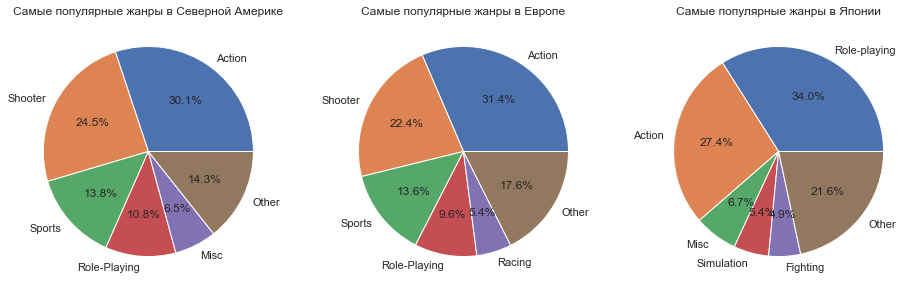

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5)) # создания ряда из трех диаграмм
axes[0].pie(na_genres.values, labels=na_genres.index, autopct = '%1.1f%%') # круговая диаграмма, показывающая доли продаж на топ-5 платформах в Северной Америке в процентах
axes[0].set_title('Самые популярные жанры в Северной Америке') # название диаграммы
axes[1].pie(eu_genres.values, labels=eu_genres.index, autopct = '%1.1f%%') # круговая диаграмма, показывающая доли продаж на топ-5 платформах в Европе в процентах
axes[1].set_title('Самые популярные жанры в Европе') # название диаграммы
axes[2].pie(jp_genres.values, labels=jp_genres.index, autopct = '%1.1f%%') # круговая диаграмма, показывающая доли продаж на топ-5 платформах в Европе в процентах
axes[2].set_title('Самые популярные жанры в Японии') # название диаграммы

**Вывод**

Во всех регионах в топ-5 жанров входят Role-Playing и Action. 

В Северной Америке и в Европе первое место по популярности занимает жанр Action (около 30% от всех продаж), второе - жанр Shooter (около четверти продаж), третье - Sports (14% продаж), четвертвое - Role-Playing (10% продаж). Однако на пятом месте в Северной Америке стоит жанр Misc, а в Европе - Racing. Жанр Racing встречается в топ-5 жанром только в Европе.

В Японии предпочитаемые жанры игр значительно отличаются от жанров, предпочитаемых в Северной Америке и в Европе. На первом месте стоит жанр Role-playing, на втором - Action, на третьем - Misc, на четвертом - Simulation, на пятом - Fighting. Жанры Simulation и Fighting входят в топ-5 самых популярных жанров только в Японии.

Вероятно, такое различие в предпочитаемых жанрах связано с национальными особенностями покупателей.


### Определение влияния рейтинга ESRB на продажи в отдельном рейгионе

#### Продажи игр в  Северной Америке в соотвествии с их рейтингами

In [57]:
na_rating = data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False) # объемы продаж в соответствии с рейтингом игр в Северной Америке, отсортированные по убыванию
na_rating

rating
M          231.57
E          114.37
unknown    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

#### Продажи игр в Европе в соотвествии с их рейтингами

In [58]:
eu_rating = data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False) # объемы продаж в соответствии с рейтингом игр в Европе, отсортированные по убыванию
eu_rating

rating
M          193.96
E          113.03
unknown     91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64

####  Продажи игр в Японии в соотвествии с их рейтингами

In [59]:
jp_rating = data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False) # объемы продаж в соответствии с рейтингом игр в Японии, отсортированные по убыванию
jp_rating

rating
unknown    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64

#### Диаграмма процентного распределения продаж игр в зависимости от их рейтинга

Text(0.5, 1.0, 'Рейтинги ESRB и продажи игр в Японии')

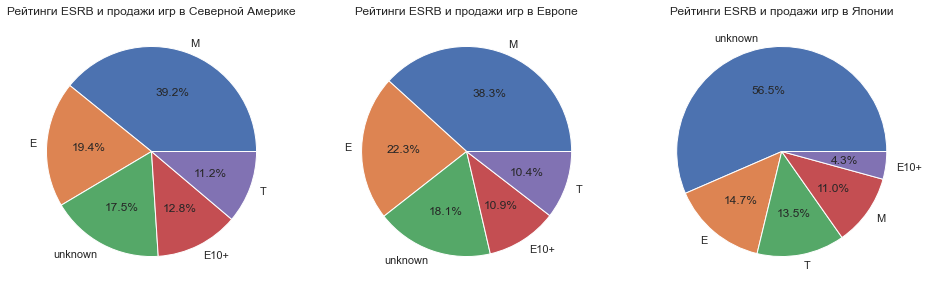

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(16, 8))
axes[0].pie(na_rating.values, labels = na_rating.index, autopct = '%1.1f%%')
axes[0].set_title('Рейтинги ESRB и продажи игр в Северной Америке')
axes[1].pie(eu_rating.values, labels = eu_rating.index, autopct = '%1.1f%%')
axes[1].set_title('Рейтинги ESRB и продажи игр в Европе')
axes[2].pie(jp_rating.values, labels = jp_rating.index, autopct = '%1.1f%%')
axes[2].set_title('Рейтинги ESRB и продажи игр в Японии')

**Вывод**

В Северной Америке и в Европе распределение популярности рейтингов игр практически одинаковое. В обоих регионах популярнее всего игры категории "М" (для взрослых) и занимают почти 40% рынка, второе место по популярности занимают игры с рейтингом "Е" (для всех), третье место - игры с неизвестным жанром, четвертое - игры с рейтингом "Е10+" (для детей страше 10 лет и взрослых), пятое - игры с рейтингом "Т" (для подростков).

В Японии больше половины игр имеют неизвестный рейтинг. Возможно, это новые игры, которым еще не успели присвоить рейтинг. Объективно судить о распределении рейтингов в Японии нельзя, так как нет данных по более чем половине игр. По имеющимся данным можно сказать, что игры с рейтингом "Е" занимают второе по популярности, хотя они на примерно на треть менее популярны чем в Северной Америке и в Европе. Игры для подростков занимают третье место по популярности и несколько более популярны в Японии по сравнению с другими регионами. Игры с рейтигом "М" почти в 4 раза менее популярны в Японии, чем в других регионах. Игры с рейтингом "Е10+" в Японии занимают пятое место и примерно в два раза менее популярны, чем в Северной Америке и в Европе. 

## Проверка гипотез

### Проверка гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC 

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различны

Так как не требуется узнать, у какой именно платформы выше пользовательский рейтинг, то для проверки этой гипотезы будет использован двусторонний тест t-тест.

In [61]:
data_xone = data.query('platform == "XOne"') # таблица со строками только о платформе Xbox One
data_pc = data_actual.query('platform == "PC"') # таблица со строками только о платформе PC

In [62]:
alpha = 0.05 # критический уровень статистической значимости
result = st.ttest_ind(data_xone['user_score'], data_pc['user_score']) # двусторонний t-тест для сравнения пользовательских рейтингов платформ Xbox One и PC
print('p-значение: ', result.pvalue) # рассчет p-значения
if result.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

p-значение:  0.05605440473353122
Нулевая гипотеза не отвергается


**Вывод**

По результатам двухстороннего t-теста, нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC не получилось отвергнуть.

### Провека гипотезы о равенстве cредних пользовательских рейтингов жанров Action и Sports 

Нулевая гипотеза: средние пользовательские рейтинги жанров action и sports равны
    
Альтернативная гипотеза: средние пользовательские рейтинги жанров action и sports различны

Так как необходимо узнать, если ли различия в любую сторону, то будет использован двустронний t-тест.

In [63]:
data_action = data.query('genre == "Action"') # таблица только с играми в жанре action
data_sports = data.query('genre == "Sports"') # таблица только с играми в жанре sports

In [64]:
alpha = 0.05 # критический уровень статистической значимости
result = st.ttest_ind(data_action['user_score'], data_sports['user_score'])# двусторонний t-тест для сравнения пользовательских рейтингов жарнов Action и Sports
print('р-значение: ', result.pvalue)
if result.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

р-значение:  7.872830248017558e-09
Нулевая гипотеза отвергается


Так как пользовательские рейтинги жанров Action и Sports не равны необходимо узнать, какой именно жанр пользователи оценивают выше. Для этого будет проведен односторонний t-тест.

Нулевая гипотеза: cредние пользовательские рейтинги жанра Action меньше, чем для жанра Sports

Альтернативная гипотеза: cредние пользовательские рейтинги жанра Action больше, чем  для жанра Sports


In [65]:
interested_value = data_sports['user_score'].mean()
alpha = 0.05
results = st.ttest_1samp(data_action['user_score'], interested_value) # односторонний t-тест для сравнение средних пользовательских рейтингов жанра action с со средними пользовательскими рейтингами жанра sports 

print('p-значение:', results.pvalue /2) # p-значение для одностороннего теста

if (results.pvalue/2 < alpha) and (data_action['user_score'].mean() > interested_value):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.9973589988198386e-19
Отвергаем нулевую гипотезу


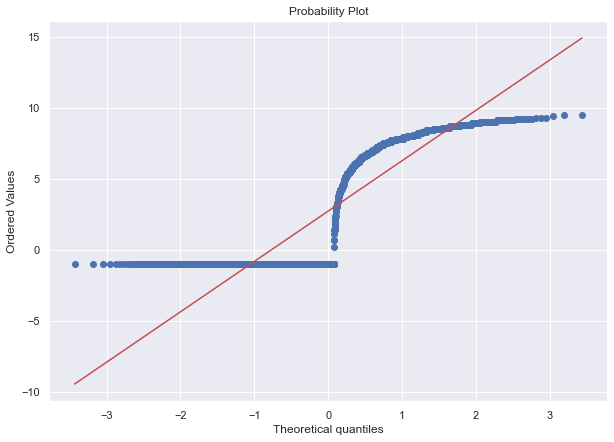

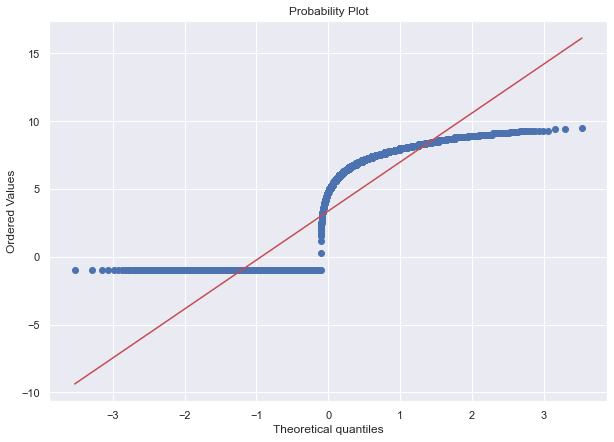

р-значение:  7.872830248017558e-09
Нулевая гипотеза отвергается
None


In [66]:
import pylab 
import scipy.stats as stats

def test_hypothesis(data_1, data_2):
    """Функция, проверяющая гипотезу с помощью двустороннего t-теста"""
    # проверка на нормальность - qq plot?

    plt.figure(figsize=(10,7))
    stats.probplot(data_1['user_score'], dist="norm", plot=pylab)
    pylab.show()

    # QQ Plot для таблице по PC для проверки нормальности распределения
    plt.figure(figsize=(10,7))
    stats.probplot(data_2['user_score'], dist="norm", plot=pylab)
    pylab.show()
    # проверка равенства дисперсий
    alpha = 0.05 # критический уровень статистической значимости
    result = st.ttest_ind(data_1['user_score'], data_2['user_score'])# двусторонний t-тест для сравнения пользовательских рейтингов жарнов Action и Sports
    print('р-значение: ', result.pvalue)
    if result.pvalue < alpha:
        print('Нулевая гипотеза отвергается')
    else:
        print('Нулевая гипотеза не отвергается')
        
print(test_hypothesis(data_sports, data_action))

**Вывод**

По результатам двухстороннего t-теста средние пользовательские рейтинги жанров Action и Sports не равны. Для того, чтобы уточнить, какой именно жанр более популярен был проведен одлносторонний t-тест. По результатам этого теста нулевая гипотеза (cредние пользовательские рейтинги жанра Action меньше, чем для жанра Sports) была отвергнула, и была принята альтернативная гипотеза (cредние пользовательские рейтинги жанра Action больше, чем для жанра Sports).

## Общий вывод

С 2010 года наблюдается спад количества игр, выпущенных на платформах. Это может быть связано с тем, что покупатели все больше предпочитают компьютерные игры на мобильных телефонах, поэтому в 2017 году стоит сделать ставку на продажу игр, выпускаемых для мобильных телефонов. 

В 2016 году перестали поддерживаться игры на платформах DS, Wii, X360 и PSP. Из оставшихся платформ, самые большие продажи собирает платформа PS4, вторая по доходности платформа - XOne. Платформы 3DS, PC, WiiU и PSV имеют довольно низкие продажи: окло 5 млн копий.

От момента появления до момента прекращения поддержки игровых платформых проходит около 10 лет. Игровые платформы вначале своего появления стремительно набирают поплярность, а затем их популярность начинает постепенно падать.

Продажи игр слабоположительно коррелируют с оценками критиков и пользователей, следовательно, на продажи в большей мере играют и другие факторы. Например, чем успешнее будет рекламная кампания перед выпуском игры, тем больший ажиотаж создастся у потенциальных покупателей, и тем больше людей купят игры после ее релиза.

Основная часть продаж приходится на Северную Америку, Европу 

Игры, произведенные на японских платформах, занимают самую значительную часть рынка. В 2017 году имеет смысл ориентироваться на игры на платформах PS3, PS4, PSV, 3DS.

Cамые популярные жанры во всех регионах - Role-Playing и Action. Рекламная кампания для игр разных жанров должна учитывать предпочения жителей разных регионов. В Европе и в Северной Америке наибольший интерес у пользователей представляют жанры Action и Shooter, в Японии - Role-playing и Action.

Самыми кассовыми жанрами в Европе и в Америке являются игры жанров "М" и "Е".